In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
df = sns.load_dataset('titanic')

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
df.isna().sum()

# True == 1 False == 0

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [61]:
df.describe()

# descriptive statistics

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df[['sex','embarked','deck']].describe()

,sex,embarked,deck
count,891,889,203
unique,2,3,7
top,male,S,C
freq,577,644,59


In [24]:
df['sex'].value_counts(dropna=False)

male      577
female    314
Name: sex, dtype: int64

In [25]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
df['fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: fare, Length: 891, dtype: float64

In [27]:
df.sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
271,1,3,male,25.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,yes,True
597,0,3,male,49.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0000,S,First,man,True,NaN,Southampton,no,True
277,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True


In [ ]:
one hot encoding
label encoding

Ratio
Interval

nominal
ordinal

C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

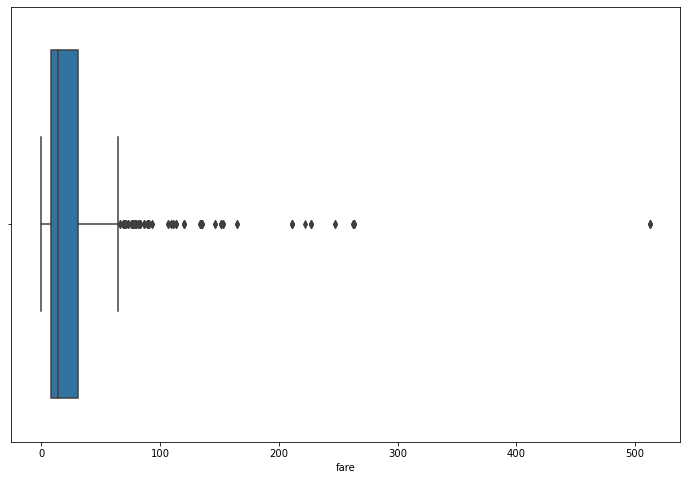

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(df['fare'])

In [11]:
## Tukey Rule

In [14]:
q1 = df['age'].quantile(0.25)

In [15]:
q3 = df['age'].quantile(0.75)

In [16]:
iqr = q3-q1

In [17]:
ub = (1.5*iqr) + q3

In [18]:
lb = q1 - (1.5*iqr)

In [19]:
ub

64.8125

In [20]:
lb

-6.6875

In [22]:
df['age'][df['age']>ub]

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

In [28]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:xlabel='survived', ylabel='pclass'>

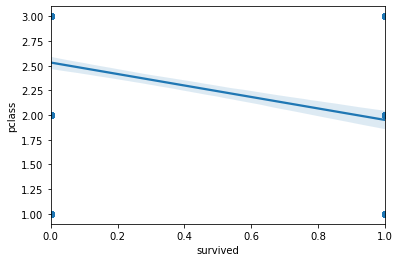

In [29]:
sns.regplot(x = 'survived', y = 'pclass', data = df)

In [30]:
# discrete continuous

In [31]:
df2 = sns.load_dataset('mpg')

In [32]:
df2.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:xlabel='mpg', ylabel='weight'>

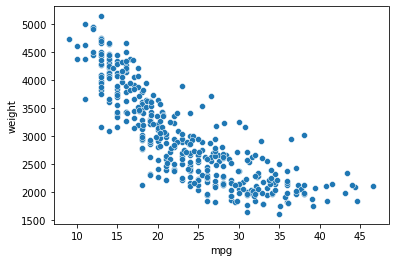

In [34]:
sns.scatterplot(x='mpg', y='weight', data=df2)

In [36]:
df['survived'].apply(str)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: object

In [37]:
df['survived'].astype(str)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: object

In [63]:
pd.to_numeric(df['survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [100]:
 #df = df.drop(df[df['embarked']=='A'].index,inplace=True)

In [101]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [106]:
df['embarked'].isna().sum()

2

In [103]:
df['embarked'].fillna('A')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [105]:
df[df['embarked']=='A']

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [107]:
df['deck'].value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [108]:
df.groupby('deck')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
deck,,,,,,,,
A,15.0,39.623887,17.975333,0.0000,30.8479,35.50000,50.24790,81.8583
B,47.0,113.505764,109.301500,0.0000,57.0000,80.00000,120.00000,512.3292
C,59.0,100.151341,70.225588,26.5500,42.5021,83.47500,143.59165,263.0000
D,33.0,57.244576,29.592832,12.8750,30.0000,53.10000,77.28750,113.2750
E,32.0,46.026694,32.608315,8.0500,26.1125,45.18125,56.15730,134.5000
F,13.0,18.696792,11.728217,7.6500,7.7500,13.00000,26.00000,39.0000
G,4.0,13.581250,3.601222,10.4625,10.4625,13.58125,16.70000,16.7000


In [110]:
df['deck'].isna().sum()

688